In [1]:
from keras.layers import Input,Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\ajarun\DL\Multiclass classification using Keras\pics\train'
valid_path = r'C:\Users\ajarun\DL\Multiclass classification using Keras\pics\test'

In [3]:
# add preprocessing layer to the front of InceptionV3
iv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bcbd6486424b2319ff4ef7d526e38f63 so we will re-download the data.
87916544/87910968 [==============================] - 837s 10us/step


In [4]:
# don't train existing weights
for layer in iv3.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob(r'C:\Users\ajarun\DL\Multiclass classification using Keras\pics\train\*')
folders

['C:\\Users\\ajarun\\DL\\Multiclass classification using Keras\\pics\\train\\arun',
 'C:\\Users\\ajarun\\DL\\Multiclass classification using Keras\\pics\\train\\jan',
 'C:\\Users\\ajarun\\DL\\Multiclass classification using Keras\\pics\\train\\sar',
 'C:\\Users\\ajarun\\DL\\Multiclass classification using Keras\\pics\\train\\sat']

In [6]:
# our layers - you can add more if you want
x = Flatten()(iv3.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=iv3.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 94 images belonging to 4 classes.
Found 9 images belonging to 4 classes.


In [11]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/5
3/3 [==============================] - 21s 7s/step - loss: 4.6128 - accuracy: 0.2872 - val_loss: 13.2006 - val_accuracy: 0.4444
Epoch 2/5
3/3 [==============================] - 13s 4s/step - loss: 4.5990 - accuracy: 0.4787 - val_loss: 9.1767 - val_accuracy: 0.6667
Epoch 3/5
3/3 [==============================] - 13s 4s/step - loss: 2.2162 - accuracy: 0.6809 - val_loss: 5.8262 - val_accuracy: 0.3333
Epoch 4/5
3/3 [==============================] - 14s 5s/step - loss: 0.9938 - accuracy: 0.7021 - val_loss: 3.0038 - val_accuracy: 0.4444
Epoch 5/5
3/3 [==============================] - 13s 4s/step - loss: 0.5372 - accuracy: 0.8404 - val_loss: 4.4982 - val_accuracy: 0.6667


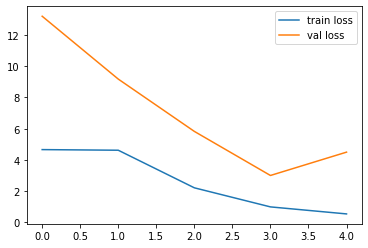

<Figure size 432x288 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

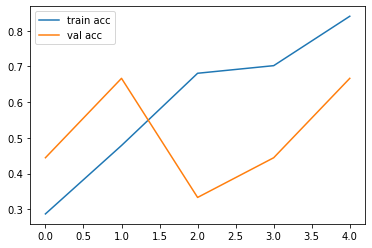

<Figure size 432x288 with 0 Axes>

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

[[1. 0. 0. 0.]]
1
Arun


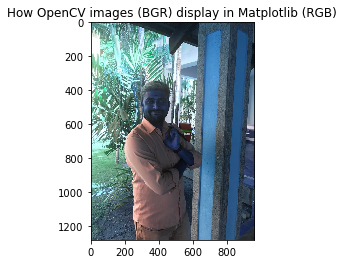

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\ajarun\pics\test\sat\1.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
print(result)
values = np.array(result)
index_max = np.argmax(values)+1
print(index_max)
if index_max==2:
    prediction='jan'
elif index_max==1:
    prediction='Arun'
elif index_max==3:
    prediction='Saravanan'
elif index_max==4:
    prediction='Sathish'
else:
    prediction ='New person'
print(prediction)

'''training_set.class_indices
if result[0][0]>=0.5:
    prediction= 'dog'
else:
    prediction = 'cat'
print(prediction)'''

%matplotlib inline
imgloc = r'C:\Users\ajarun\pics\test\sat\1.jpg'
img= cv2.imread(imgloc)
plt.title('How OpenCV images (BGR) display in Matplotlib (RGB)')
plt.imshow(img)
plt.show()

In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_iv3_model.h5')
